CO2 EMISSION PREDICTOR

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [153]:
data = pd.read_csv('Fuel.csv')

In [154]:
x = data[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']].values
y = data['CO2EMISSIONS'].values

Feature Scaling

In [155]:
mean = np.mean(x, axis=0)
std = np.std(x, axis=0)
x = (x - mean) / std

In [156]:
alpha = 0.01
iterations = 1000

Splitting Data into Training and Testig the Model

In [157]:
split_ratio = 0.8
split_index = int(len(x) * split_ratio)

x_train= x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

Initial weights and bias

In [158]:
m = x_train.shape[0]
n = x_train.shape[1]
weights = np.zeros(n)
bias = 0

Gradient Descent

In [2]:
for i in range(iterations):
    dj_dw=np.zeros(n)
    y_predicted = np.dot(x_train, weights) + bias

    for j in range(n):
        dj_dw[j] += (1/m) * np.sum(np.dot(x_train[:split_index, j], (y_predicted - y_train)))

    dj_db=0
    dj_db+=np.sum(y_predicted-y_train)/m
    weights-=alpha*dj_dw
    bias-=alpha*dj_db

NameError: name 'iterations' is not defined

In [160]:
y_pred = np.dot(x_test, weights) + bias

Model Graph

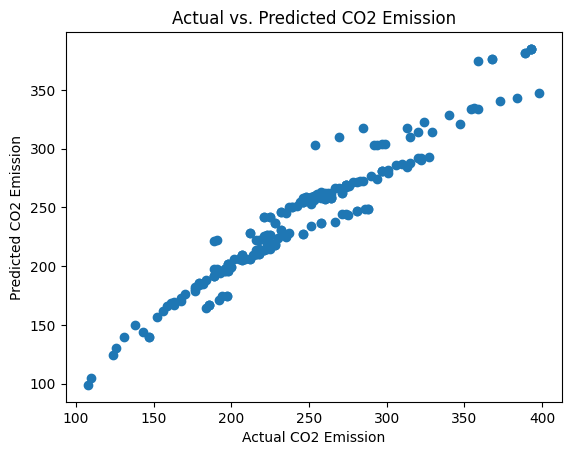

In [161]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs. Predicted CO2 Emission")
plt.show()

In [162]:
def r2_score(y_true, y_pred):
    mean_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

**Model Performance**

In [171]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f'RMSE: {rmse:.2f}')

R-squared: 0.94
RMSE: 14.97


**Comparision with Sklearn library**




In [164]:
#Comparing my result with scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
model = LinearRegression()

In [166]:
model.fit(x_train,y_train)

LinearRegression()

In [167]:
y_actual=model.predict(x_test)

Sklearn Performance

In [170]:
r2 = r2_score(y_test, y_actual)
print(f'R-squared: {r2:.2f}')
rmse2 = np.sqrt(np.mean((y_actual - y_test) ** 2))
print(f'RMSE: {rmse2:.2f}')

R-squared: 0.94
RMSE: 14.91


Sklearn Graph

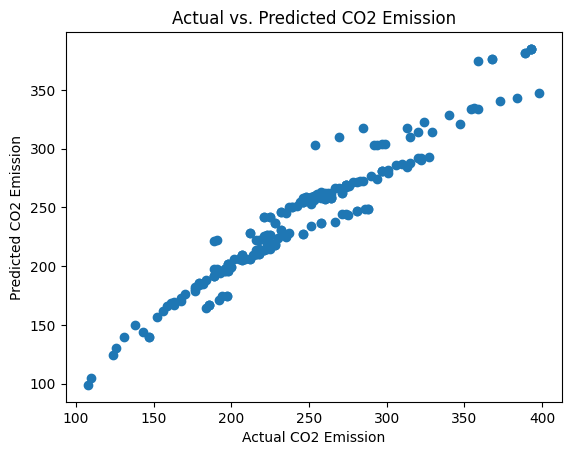

In [169]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs. Predicted CO2 Emission")
plt.show()